### Is feature order the same for clinvar and panel?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
panel_file = '../data/interim/panel.dat'
panel_df_pre = pd.read_csv(panel_file, sep='\t')
panel_df = panel_df_pre[['Disease', 'gene']].rename(columns={'Disease':'panel_disease'})

clinvar_file = '../data/interim/clinvar/clinvar.eff.dbnsfp.anno.dat.limit.xls'
clinvar_df_pre = pd.read_csv(clinvar_file, sep='\t')
clinvar_df_pp = pd.merge(panel_df, clinvar_df_pre, on=['gene'], how='left')
clinvar_df = clinvar_df_pp[clinvar_df_pp.Disease=='clinvar_single']

EPI
Feature ranking:
EPI 1. ccr (0.312296)
EPI 2. fathmm (0.278837)
EPI 3. vest (0.235274)
EPI 4. missense_depletion (0.075391)
EPI 5. missense_badness (0.058111)
EPI 6. is_domain (0.040091)


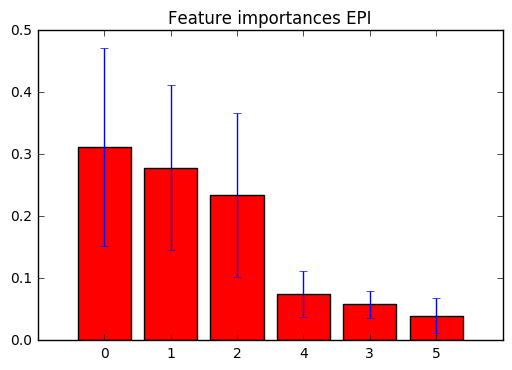

Cardiomyopathy
Feature ranking:
Cardiomyopathy 1. vest (0.322856)
Cardiomyopathy 2. missense_depletion (0.187972)
Cardiomyopathy 3. ccr (0.171475)
Cardiomyopathy 4. fathmm (0.158626)
Cardiomyopathy 5. missense_badness (0.108975)
Cardiomyopathy 6. is_domain (0.050095)


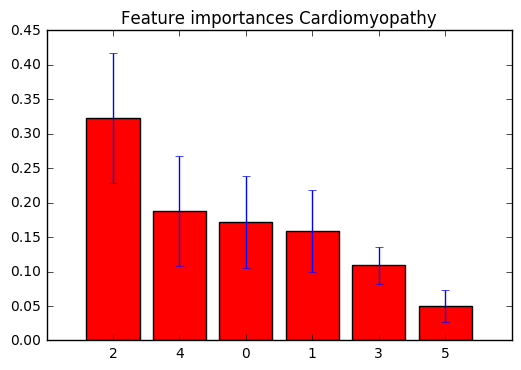

Rasopathies
Feature ranking:
Rasopathies 1. ccr (0.327537)
Rasopathies 2. vest (0.253966)
Rasopathies 3. fathmm (0.137948)
Rasopathies 4. missense_badness (0.110191)
Rasopathies 5. is_domain (0.097805)
Rasopathies 6. missense_depletion (0.072553)


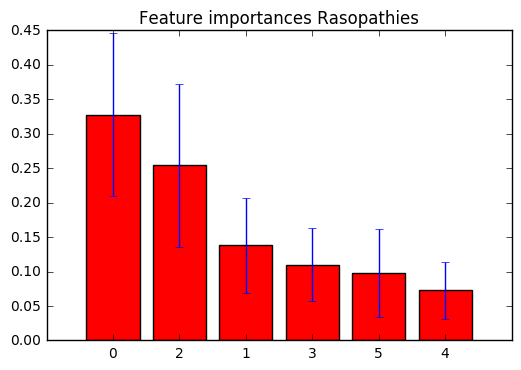

In [3]:
cols = ['ccr', 'fathmm', 'vest', 'missense_badness', 'missense_depletion', 'is_domain']
for disease in set(clinvar_df['panel_disease']):
    print(disease)
    X = clinvar_df[clinvar_df.panel_disease==disease][cols]
    y = clinvar_df[clinvar_df.panel_disease==disease]['y']

    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%s %d. %s (%f)" % (disease, f + 1, cols[indices[f]], importances[indices[f]]))

    plt.figure()
    plt.title("Feature importances " + disease)
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [8]:
!jupyter nbconvert --to=python feature-importance-clinvar.ipynb --stdout > cv3_tmp.py

[NbConvertApp] Converting notebook feature-importance-clinvar.ipynb to python
